![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [37]:
# We've loaded your first package for you! You can add as many cells as you need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Begin coding here ...

# Read in Files

In [38]:
import pandas as pd

# Read in csv
df_airbnb_price = pd.read_csv('data/airbnb_price.csv')
print(df_airbnb_price.info())

# Read in xlsx
df_airbnb_room_type = pd.read_excel('data/airbnb_room_type.xlsx')
print(df_airbnb_room_type.info())

# Read in tsv
df_airbnb_last_review = pd.read_csv('data/airbnb_last_review.tsv', delimiter='\t')
print(df_airbnb_last_review.info())

# Join the data 
df_airbnb = df_airbnb_price.merge(df_airbnb_room_type, how='inner').merge(df_airbnb_last_review, how='inner')
print(df_airbnb.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-n

# EDA

In [39]:
# Describe object dtypes
df_airbnb.describe(include='object')

,price,nbhood_full,description,room_type,host_name,last_review
count,25209,25209,25199,25209,25201,25209
unique,536,217,24946,9,7363,190
top,150 dollars,"Brooklyn, Bedford-Stuyvesant",Loft Suite @ The Box House Hotel,Entire home/apt,Michael,June 23 2019
freq,982,2209,10,8458,215,1413


<AxesSubplot: title={'center': 'Top 10 Price Values'}>

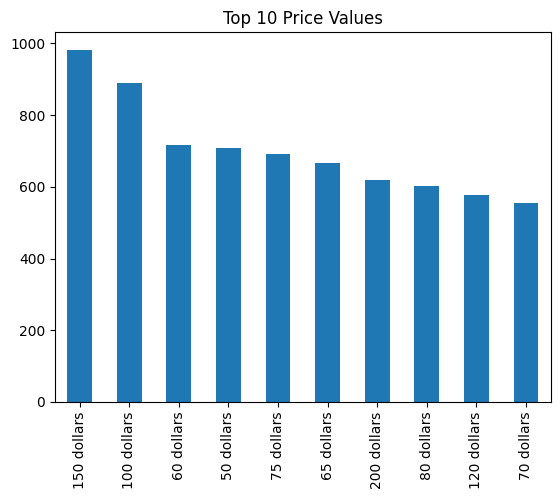

In [40]:
# Price
df_airbnb['price'].value_counts()[:10].plot.bar(title='Top 10 Price Values')

In [41]:
# Convert Price to a float
df_airbnb['price'] = df_airbnb['price'].str.replace(' dollars','').astype('float')

print(df_airbnb['price'].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


<AxesSubplot: title={'center': 'Top 10 Last Review'}>

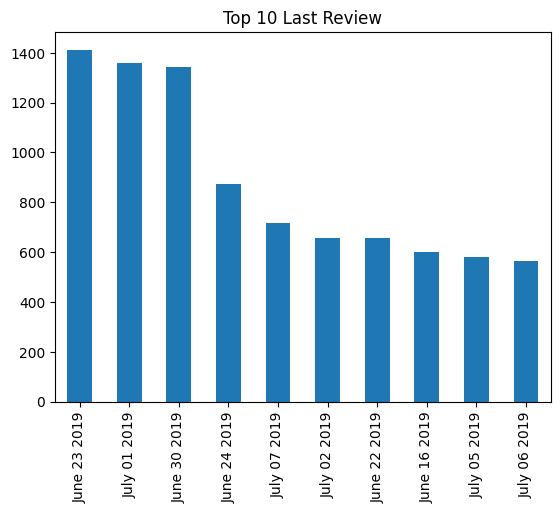

In [42]:
# Last Review Date to date
df_airbnb['last_review'].value_counts()[:10].plot.bar(title='Top 10 Last Review')

In [43]:
# Change Last Review to datetime
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], format='%B %d %Y')

print('last_review dtype is', df_airbnb['last_review'].dtype)

print(df_airbnb['last_review'].describe())

last_review dtype is datetime64[ns]
count                   25209
unique                    190
top       2019-06-23 00:00:00
freq                     1413
first     2019-01-01 00:00:00
last      2019-07-09 00:00:00
Name: last_review, dtype: object


<AxesSubplot: title={'center': 'Before Room Types'}>

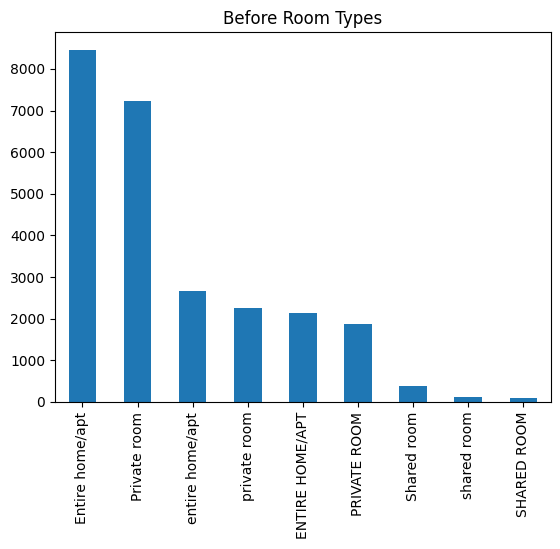

In [44]:
# Room Type
df_airbnb['room_type'].value_counts().plot.bar(title='Before Room Types')

<AxesSubplot: title={'center': 'After Room Types'}>

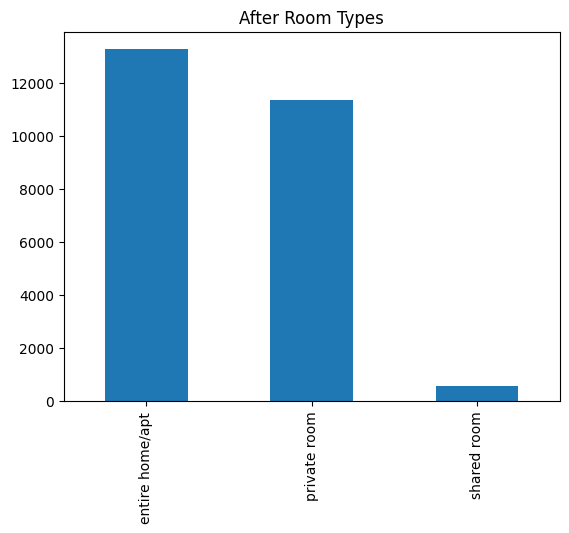

In [45]:
# Change to lower case for all room types
df_airbnb['room_type'] = df_airbnb['room_type'].str.lower()

# Check for the change implemented
df_airbnb['room_type'].value_counts().plot.bar(title='After Room Types')

## What are the dates of the earliest and most recent reviews?

In [46]:
# Describe the Last Review 
last_review=df_airbnb['last_review'].describe()

# Get the Earliest Date
last_review_earliest = last_review[4]

# Get the Recent Review Date
last_review_recent = last_review[5]

# Print
print(f'The earliest last review date is {last_review_earliest}.')
print(f'The recent last review date is {last_review_recent}.')


The earliest last review date is 2019-01-01 00:00:00.
The recent last review date is 2019-07-09 00:00:00.


## How many private room listings?

In [47]:
# Count how many private rooms
private_room_listing_num = len(df_airbnb[df_airbnb['room_type']=='private room'])

# Print
print(f'The number of private room listings is {private_room_listing_num}')

The number of private room listings is 11356


## What is the average listing price?

In [48]:
# Get the mean price and round to the nearest hundredth
average_listing_price = round(df_airbnb['price'].mean(), 2)

# Print
print(f'The Average Listing price is {average_listing_price}.')

The Average Listing price is 141.78.


## Combine the new variables into one data frame

In [49]:
# Combine all variables into a single dataframe
review_dates = pd.DataFrame({'first_reviewed' : [last_review_earliest],
                            'last_reviewed' : [last_review_recent],
                            'nb_private_rooms' : [private_room_listing_num],
                            'avg_price' : [average_listing_price]})
# Display
review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78
